In [2]:
import numpy as np
# from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib inline

sns.set_style('whitegrid')

In [3]:
opt_sig = pd.read_csv('idetc2016_sigma_player2.csv')[['trial '+str(i) for i in range(1,11)]]
opt_sig.index.name='time'
opt_sig

,trial 1,trial 2,trial 3,trial 4,trial 5,trial 6,trial 7,trial 8,trial 9,trial 10
time,,,,,,,,,,
0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1
2,10.1,17.0,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1
3,20.6,17.0,10.1,10.1,10.1,10.1,10.1,36.5,10.1,10.1
4,20.6,17.0,10.1,10.1,10.1,10.1,10.1,36.5,10.1,10.1
5,20.6,17.0,10.1,10.1,10.1,10.1,13.9,36.5,14.6,10.1
6,20.6,17.0,10.1,10.1,11.0,10.1,13.9,36.5,14.6,10.1
7,20.6,17.0,10.1,10.1,12.2,10.1,13.9,36.5,14.6,10.1
8,20.6,17.0,10.1,10.1,12.2,10.1,26.0,36.5,14.6,10.1


In [4]:
unit_sig = pd.read_csv('idetc2016_unit_sigma_player2.csv')[['trial '+str(i) for i in range(1,11)]]
unit_sig.index.name='time'
unit_sig

,trial 1,trial 2,trial 3,trial 4,trial 5,trial 6,trial 7,trial 8,trial 9,trial 10
time,,,,,,,,,,
0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1
2,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1
3,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.1,33.2,10.1
4,10.1,10.1,10.1,10.1,10.1,11.2,10.1,10.1,33.2,10.1
5,10.1,22.6,10.1,10.1,10.1,11.2,10.1,10.1,33.2,10.1
6,10.1,22.6,10.1,10.1,10.1,11.2,10.1,10.1,33.2,10.1
7,10.1,22.6,10.1,10.1,10.1,11.2,10.1,10.1,33.2,19.7
8,10.1,22.6,10.1,10.1,10.1,11.2,10.1,18.1,33.2,19.7


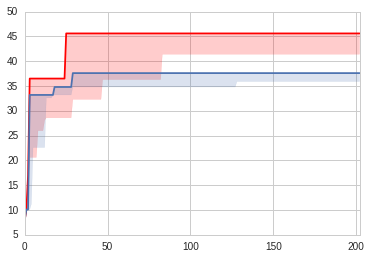

In [6]:
sns.tsplot(opt_sig.T.values, color='r', ci=[68], err_style=['ci_band'], estimator=np.max)
sns.tsplot(unit_sig.T.values, ci=[68], err_style=['ci_band'], estimator=np.max)

(5, 50)

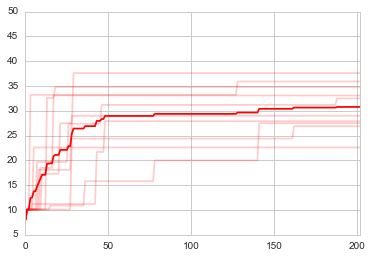

In [30]:
sns.tsplot(unit_sig.T.values, color='r', err_style='unit_traces')
plt.ylim(5,50)